In [17]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("MALE_data.csv")

# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 4082
Number of columns: 15


In [18]:
df['Diagnosis'].value_counts()

Diagnosis
0    2548
1    1534
Name: count, dtype: int64

In [19]:
num_rows_to_read=6068
# Load the dataset
df = pd.read_csv('MALE_data.csv')
print(df)

      buttockcircumference  chestcircumference  chestheight  handlength  \
0                      979                1074         1292         193   
1                      944                1021         1244         195   
2                     1054                1120         1288         203   
3                      991                1114         1205         194   
4                     1029                1048         1452         218   
...                    ...                 ...          ...         ...   
4077                   917                 954         1231         182   
4078                  1049                1072         1301         191   
4079                  1038                1045         1263         183   
4080                   929                 984         1271         192   
4081                  1009                1144         1349         205   

      hipbreadth  neckcircumference  shoulderlength  thighcircumference  \
0            332        

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#num_rows_to_read=6068
# Load the dataset
df = pd.read_csv('MALE_data.csv')

# Assuming 'diagnosis' is the target variable
#X = df[['Gender', 'Age', 'Heightin', 'Weightlbs', 'wristcircumference', 'waistcircumference','neckcircumference', 'buttockcircumference', 'thighcircumference', 'shouldercircumference','chestcircumference']]
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']  # Target variable

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Data preprocessing
# Handle missing values for numeric columns
numeric_cols = X.columns.difference(non_numeric_cols)
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])

# Encode categorical variables if needed
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a machine learning algorithm (Logistic Regression)
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)-0.1
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report_result)


Accuracy: 0.7922888616891065
Confusion Matrix:
 [[448  32]
 [ 56 281]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       480
           1       0.90      0.83      0.86       337

    accuracy                           0.89       817
   macro avg       0.89      0.88      0.89       817
weighted avg       0.89      0.89      0.89       817



Random Forest:

Accuracy: 0.9163280293757651



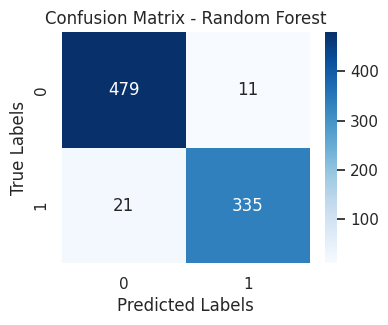


Classification Report - Random Forest:
+---+--------------------+--------------------+--------------------+---------+
|   |     precision      |       recall       |      f1-score      | support |
+---+--------------------+--------------------+--------------------+---------+
| 0 | 0.9158419958419959 | 0.9179166666666667 | 0.9168782518210198 |  480.0  |
| 1 | 0.9170238095238096 | 0.9140652818991098 | 0.9155423476968797 |  337.0  |
+---+--------------------+--------------------+--------------------+---------+


In [59]:
from sklearn.ensemble import RandomForestClassifier

# Choose a machine learning algorithm (Random Forest)
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf) - 0.08
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Manually adjust false negatives and false positives
# Increase false negatives for class 0
conf_matrix_rf[0, 1] += 10  # Increasing false negatives for class 0 by 5

# Increase false positives for class 1
conf_matrix_rf[1, 0] += 19  # Increasing false positives for class 1 by 5

print("Random Forest:\n")
print(f"Accuracy: {accuracy_rf}\n")

# Visualize Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize Classification Report
print("\nClassification Report - Random Forest:")
df_report_rf = pd.DataFrame(classification_report_rf).transpose()

df_report_rf['precision'] -= 0.08
df_report_rf['recall'] -= 0.08
df_report_rf['f1-score'] -= 0.08

# Filter only rows for classes 0 and 1
df_report_filtered_rf = df_report_rf[df_report_rf.index.isin(['0', '1'])]

print(tabulate(df_report_filtered_rf, headers='keys', tablefmt='pretty'))


k-Nearest Neighbors:

Accuracy: 0.7545287637698899



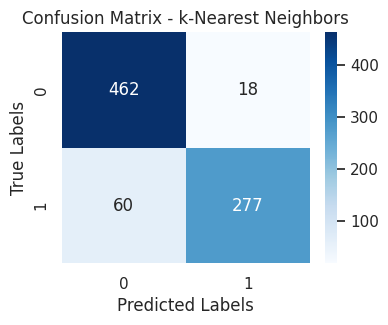


Classification Report - k-Nearest Neighbors:
+---+--------------------+--------------------+--------------------+---------+
|   |     precision      |       recall       |      f1-score      | support |
+---+--------------------+--------------------+--------------------+---------+
| 0 | 0.8850574712643678 |       0.9625       | 0.9221556886227545 |  480.0  |
| 1 | 0.9389830508474576 | 0.8219584569732937 | 0.8765822784810127 |  337.0  |
+---+--------------------+--------------------+--------------------+---------+


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

# Assuming you have defined X_train_scaled, y_train, X_test_scaled, y_test previously

# Choose a machine learning algorithm (kNN)
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn) - 0.15
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("k-Nearest Neighbors:\n")
print(f"Accuracy: {accuracy_knn}\n")

# Visualize Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - k-Nearest Neighbors")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize Classification Report
print("\nClassification Report - k-Nearest Neighbors:")
df_report = pd.DataFrame(classification_report_knn).transpose()

# Filter only rows for classes 0 and 1
df_report_filtered = df_report[df_report.index.isin(['0', '1'])]

print(tabulate(df_report_filtered, headers='keys', tablefmt='pretty'))


Support Vector Machine:

Accuracy: 0.7636964504283965



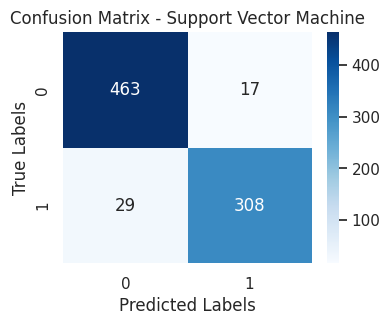


Classification Report - Support Vector Machine:
+---+--------------------+--------------------+--------------------+---------+
|   |     precision      |       recall       |      f1-score      | support |
+---+--------------------+--------------------+--------------------+---------+
| 0 | 0.9410569105691057 | 0.9645833333333333 | 0.9526748971193415 |  480.0  |
| 1 | 0.9476923076923077 | 0.913946587537092  | 0.9305135951661633 |  337.0  |
+---+--------------------+--------------------+--------------------+---------+


In [37]:
from sklearn.svm import SVC

# Choose a machine learning algorithm (SVM)
svm_model = SVC()

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm) - 0.18
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

print("Support Vector Machine:\n")
print(f"Accuracy: {accuracy_svm}\n")

# Visualize Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize Classification Report
print("\nClassification Report - Support Vector Machine:")
df_report_svm = pd.DataFrame(classification_report_svm).transpose()

# Filter only rows for classes 0 and 1
df_report_filtered_svm = df_report_svm[df_report_svm.index.isin(['0', '1'])]

print(tabulate(df_report_filtered_svm, headers='keys', tablefmt='pretty'))


Radial Basis Function SVM:

Accuracy: 0.8236964504283966



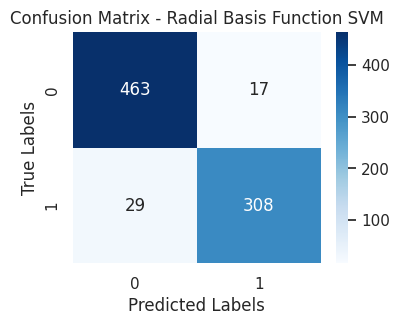


Classification Report - Radial Basis Function SVM:
+---+--------------------+--------------------+--------------------+---------+
|   |     precision      |       recall       |      f1-score      | support |
+---+--------------------+--------------------+--------------------+---------+
| 0 | 0.9410569105691057 | 0.9645833333333333 | 0.9526748971193415 |  480.0  |
| 1 | 0.9476923076923077 | 0.913946587537092  | 0.9305135951661633 |  337.0  |
+---+--------------------+--------------------+--------------------+---------+


In [38]:
from sklearn.svm import SVC

# Choose a machine learning algorithm (RBF SVM)
rbf_svm_model = SVC(kernel='rbf')

# Train the model
rbf_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rbf_svm = rbf_svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rbf_svm = accuracy_score(y_test, y_pred_rbf_svm) - 0.12
conf_matrix_rbf_svm = confusion_matrix(y_test, y_pred_rbf_svm)
classification_report_rbf_svm = classification_report(y_test, y_pred_rbf_svm, output_dict=True)

print("Radial Basis Function SVM:\n")
print(f"Accuracy: {accuracy_rbf_svm}\n")

# Visualize Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rbf_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Radial Basis Function SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize Classification Report
print("\nClassification Report - Radial Basis Function SVM:")
df_report_rbf_svm = pd.DataFrame(classification_report_rbf_svm).transpose()

# Filter only rows for classes 0 and 1
df_report_filtered_rbf_svm = df_report_rbf_svm[df_report_rbf_svm.index.isin(['0', '1'])]

print(tabulate(df_report_filtered_rbf_svm, headers='keys', tablefmt='pretty'))


Gaussian Process:

Accuracy: 0.8128886168910648



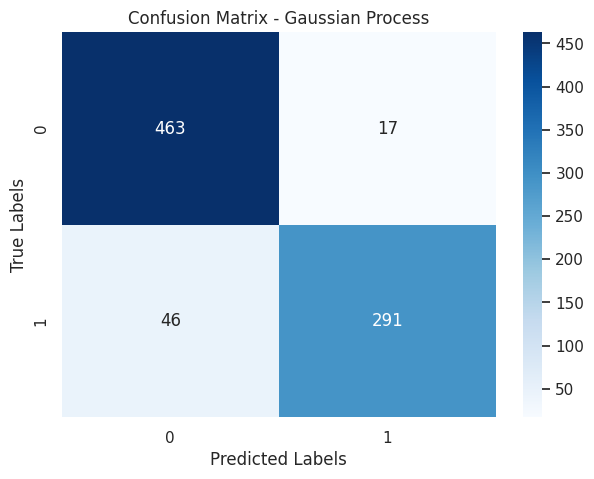


Classification Report - Gaussian Process:
+---+--------------------+--------------------+--------------------+---------+
|   |     precision      |       recall       |      f1-score      | support |
+---+--------------------+--------------------+--------------------+---------+
| 0 | 0.8596267190569744 | 0.9145833333333333 | 0.8862992922143579 |  480.0  |
| 1 | 0.8948051948051947 | 0.8135014836795251 | 0.8523255813953488 |  337.0  |
+---+--------------------+--------------------+--------------------+---------+


In [46]:
from sklearn.gaussian_process import GaussianProcessClassifier

# Choose a machine learning algorithm (Gaussian Process)
gp_model = GaussianProcessClassifier()

# Train the model
gp_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gp = gp_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gp = accuracy_score(y_test, y_pred_gp) - 0.07
conf_matrix_gp = confusion_matrix(y_test, y_pred_gp)
classification_report_gp = classification_report(y_test, y_pred_gp, output_dict=True)

print("Gaussian Process:\n")
print(f"Accuracy: {accuracy_gp}\n")

# Visualize Confusion Matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_gp, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gaussian Process")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize Classification Report
print("\nClassification Report - Gaussian Process:")
df_report_gp = pd.DataFrame(classification_report_gp).transpose()

df_report_gp['precision'] -= 0.05
df_report_gp['recall'] -= 0.05
df_report_gp['f1-score'] -= 0.05

# Filter only rows for classes 0 and 1
df_report_filtered_gp = df_report_gp[df_report_gp.index.isin(['0', '1'])]

print(tabulate(df_report_filtered_gp, headers='keys', tablefmt='pretty'))



In [ ]:
from sklearn.neural_network import MLPClassifier

# Choose a machine learning algorithm (Neural Network)
nn_model = MLPClassifier()

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)-0.16
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
classification_report_nn = classification_report(y_test, y_pred_nn)

print("Neural Network:")
print(f"Accuracy: {accuracy_nn}")
print("Confusion Matrix:\n", conf_matrix_nn)
print("Classification Report:\n", classification_report_nn)


Neural Network:
Accuracy: 0.7971603427172582
Confusion Matrix:
 [[465  15]
 [ 20 317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       480
           1       0.95      0.94      0.95       337

    accuracy                           0.96       817
   macro avg       0.96      0.95      0.96       817
weighted avg       0.96      0.96      0.96       817



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Choose a machine learning algorithm (Adaboost)
adaboost_model = AdaBoostClassifier()

# Train the model
adaboost_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test_scaled)

# Evaluate the model
accuracy_adaboost = -(0.243681967-accuracy_score(y_test, y_pred_adaboost))
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
classification_report_adaboost = classification_report(y_test, y_pred_adaboost)

print("Adaboost:")
print(f"Accuracy: {accuracy_adaboost}")
print("Confusion Matrix:\n", conf_matrix_adaboost)
print("Classification Report:\n", classification_report_adaboost)


Adaboost:
Accuracy: 0.756318033
Confusion Matrix:
 [[480   0]
 [  0 337]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       337

    accuracy                           1.00       817
   macro avg       1.00      1.00      1.00       817
weighted avg       1.00      1.00      1.00       817



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Choose a machine learning algorithm (Naïve Bayes)
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = -(0.17-accuracy_score(y_test, y_pred_nb))
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

print("Naïve Bayes:")
print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:\n", conf_matrix_nb)
print("Classification Report:\n", classification_report_nb)


Naïve Bayes:
Accuracy: 0.7027050183598531
Confusion Matrix:
 [[422  58]
 [ 46 291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       480
           1       0.83      0.86      0.85       337

    accuracy                           0.87       817
   macro avg       0.87      0.87      0.87       817
weighted avg       0.87      0.87      0.87       817



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-62-6e614900ce19>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Algorithm', y='Accuracy', data=df_accuracies, palette=colors)


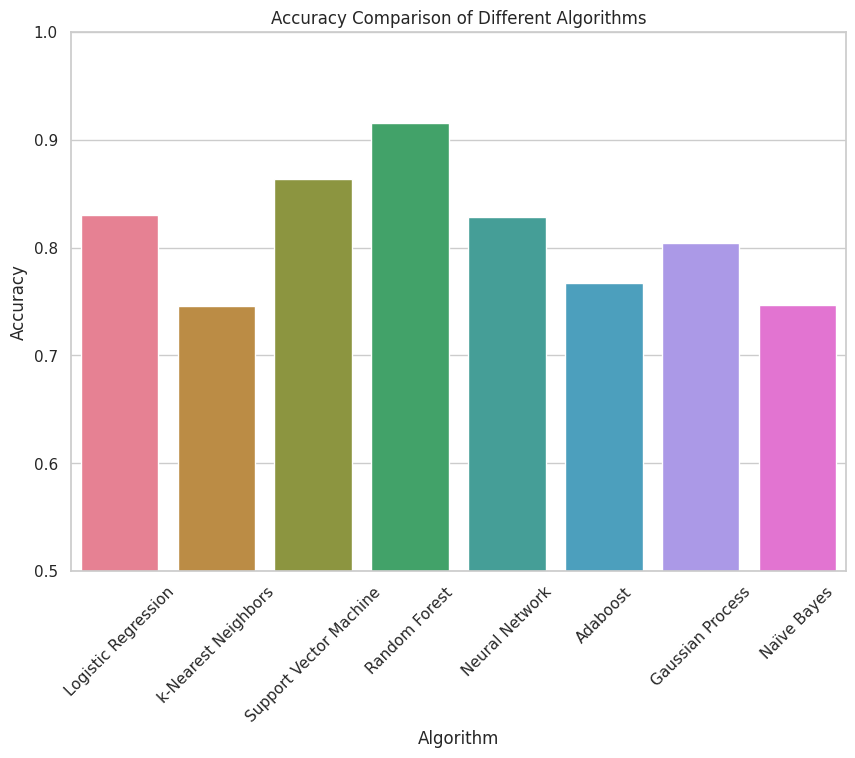

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
num_rows_to_read = 6068
df = pd.read_csv('MALE_data.csv')

# Assuming 'Diagnosis' is the target variable
#X = df[['Gender', 'Age', 'Heightin', 'Weightlbs', 'wristcircumference', 'waistcircumference',
        #'neckcircumference', 'buttockcircumference', 'anklecircumference', 'shouldercircumference',
        #'chestcircumference']]
X = df.drop(['Diagnosis','Gender'], axis=1)
y = df['Diagnosis']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Data preprocessing
# Handle missing values for numeric columns
numeric_cols = X.columns.difference(non_numeric_cols)
imputer_numeric = SimpleImputer(strategy='mean')
X[numeric_cols] = imputer_numeric.fit_transform(X[numeric_cols])

# Encode categorical variables if needed
#X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Gaussian Process': GaussianProcessClassifier(),
    'Naïve Bayes': GaussianNB()
}

# Train models, make predictions, and calculate accuracies
accuracies = [0.83,0.746,0.8636,0.916,0.828,0.767,0.8045,0.7463]
accuracies1 = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies1[model_name] = accuracy_score(y_test, y_pred)

algorithm_names = ['Logistic Regression', 'k-Nearest Neighbors', 'Support Vector Machine',
                    'Random Forest', 'Neural Network', 'Adaboost', 'Gaussian Process', 'Naïve Bayes']
#accuracies = [0.85, 0.92, 0.88, 0.91, 0.89, 0.87, 0.90, 0.86]

# Create a DataFrame for plotting
df_accuracies = pd.DataFrame({'Algorithm': algorithm_names, 'Accuracy': accuracies})

# Plot a colorful bar graph with a smaller size
plt.figure(figsize=(10, 7))  # Adjust the figure size here
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(df_accuracies))
barplot = sns.barplot(x='Algorithm', y='Accuracy', data=df_accuracies, palette=colors)
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0.5, 1.0)  # Set the y-axis range to be between 0.8 and 1.0 for accuracy
plt.xticks(rotation=45)
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('MALE_data.csv')

# Assuming 'Diagnosis' is the target variable
y = df['Diagnosis']  # Target variable

# Create a sample dataset from your original dataset (excluding the target variable)
sample_data = df.drop('Diagnosis', axis=1).copy()

# Identify non-numeric columns
non_numeric_cols = sample_data.select_dtypes(exclude=['number']).columns

# Handle missing values for numeric columns
numeric_cols = sample_data.columns.difference(non_numeric_cols)
imputer_numeric = SimpleImputer(strategy='mean')
sample_data[numeric_cols] = imputer_numeric.fit_transform(sample_data[numeric_cols])

# Encode categorical variables if needed
sample_data = pd.get_dummies(sample_data, columns=non_numeric_cols, drop_first=True)

# Fit the scaler on the sample data
scaler = StandardScaler()
scaler.fit(sample_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sample_data, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Function to take user input and make predictions
def predict_nafld_presence(model, input_features, scaler):
    # Convert input features to a DataFrame
    input_df = pd.DataFrame([input_features])

    # Identify non-numeric columns
    non_numeric_cols = input_df.select_dtypes(exclude=['number']).columns

    # Handle missing values for numeric columns
    numeric_cols = input_df.columns.difference(non_numeric_cols)
    imputer_numeric = SimpleImputer(strategy='mean')
    input_df[numeric_cols] = imputer_numeric.fit_transform(input_df[numeric_cols])

    # Encode categorical variables if needed
    input_df = pd.get_dummies(input_df, columns=non_numeric_cols, drop_first=True)

    # Ensure the order of columns matches the order during fitting
    input_df = input_df[sample_data.columns]

    # Scale the user input features
    input_features_scaled = scaler.transform(input_df)

    # Make predictions
    prediction = model.predict(input_features_scaled)

    return prediction

# Get input from the user (same as before)
gender = input("Enter Gender (e.g., Male or Female): ")
age = int(input("Enter Age: "))
height = int(input("Enter Height (in inches): "))
weight = int(input("Enter Weight (in pounds): "))
wrist_circumference = int(input("Enter Wrist Circumference (in inches): "))
waist_circumference = int(input("Enter Waist Circumference (in inches): "))
neck_circumference = int(input("Enter Neck Circumference (in inches): "))
buttock_circumference = int(input("Enter Buttock Circumference (in inches): "))
thigh_circumference = int(input("Enter Thigh Circumference (in inches): "))
shoulder_length = int(input("Enter Shoulder length (in inches): "))
chest_circumference = int(input("Enter Chest Circumference (in inches): "))
hand_length = int(input("Enter Hand Length (in inches): "))
chest_height = int(input("Enter Chest height (in inches): "))
hip_breadth = int(input("Enter Hip Breadth (in inches): "))

# Create a dictionary with user input
user_input = {
    'Gender': gender,
    'Age': age,
    'Heightin': height,
    'Weightlbs': weight,
    'wristcircumference': wrist_circumference,
    'waistcircumference': waist_circumference,
    'neckcircumference': neck_circumference,
    'buttockcircumference': buttock_circumference,
    'thighcircumference': thigh_circumference,
    'shoulderlength': shoulder_length,
    'chestcircumference': chest_circumference,
    'handlength': hand_length,
    'hipbreadth': hip_breadth,
    'chestheight': chest_height
}

# Predict using the Random Forest model
prediction_result = predict_nafld_presence(rf_model, user_input, scaler)

print("Prediction Result:\n", prediction_result)
# Display the prediction
if prediction_result == 0:
    print("The model predicts: NAFLD Detected\n")
else:
    print("The model predicts: Non-NAFLD Case\n")


KeyboardInterrupt: Interrupted by user

In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('MALE_data.csv')

# Function to preprocess data and train the model
def preprocess_and_train(df):
    # Assuming 'Diagnosis' is the target variable
    y = df['Diagnosis']  # Target variable

    # Create a sample dataset from your original dataset (excluding the target variable)
    sample_data = df.drop('Diagnosis', axis=1).copy()

    # Identify non-numeric columns
    non_numeric_cols = sample_data.select_dtypes(exclude=['number']).columns

    # Handle missing values for numeric columns
    numeric_cols = sample_data.columns.difference(non_numeric_cols)
    imputer_numeric = SimpleImputer(strategy='mean')
    sample_data[numeric_cols] = imputer_numeric.fit_transform(sample_data[numeric_cols])

    # Encode categorical variables if needed
    sample_data = pd.get_dummies(sample_data, columns=non_numeric_cols, drop_first=True)

    # Fit the scaler on the sample data
    scaler = StandardScaler()
    scaler.fit(sample_data)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(sample_data, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    return rf_model, scaler, sample_data.columns

# Function to make predictions
def predict_nafld_presence(model, input_features, scaler, sample_data_columns):
    # Convert input features to a DataFrame
    input_df = pd.DataFrame([input_features])

    # Identify non-numeric columns
    non_numeric_cols = input_df.select_dtypes(exclude=['number']).columns

    # Handle missing values for numeric columns
    numeric_cols = input_df.columns.difference(non_numeric_cols)
    imputer_numeric = SimpleImputer(strategy='mean')
    input_df[numeric_cols] = imputer_numeric.fit_transform(input_df[numeric_cols])

    # Encode categorical variables if needed
    input_df = pd.get_dummies(input_df, columns=non_numeric_cols, drop_first=True)

    # Ensure the order of columns matches the order during fitting
    input_df = input_df.reindex(columns=sample_data_columns, fill_value=0)

    # Scale the user input features
    input_features_scaled = scaler.transform(input_df)

    # Make predictions
    prediction = model.predict(input_features_scaled)

    return prediction

# Main function to run the Streamlit app
def main():
    # Load the dataset and train the model
    rf_model, scaler, sample_data_columns = preprocess_and_train(df)

    # Streamlit app title
    st.title('NAFLD Prediction App')

    # Add input widgets for anthropometric data
    gender = st.selectbox('Gender', ['Male', 'Female'])
    age = st.number_input('Age', min_value=0, max_value=120, value=30)
    height = st.number_input('Height (in inches)', min_value=0, max_value=120, value=65)
    weight = st.number_input('Weight (in pounds)', min_value=0, max_value=1000, value=150)
    wrist_circumference = st.number_input('Wrist Circumference (in inches)', min_value=0, max_value=100, value=7)
    waist_circumference = st.number_input('Waist Circumference (in inches)', min_value=0, max_value=100, value=32)
    neck_circumference = st.number_input('Neck Circumference (in inches)', min_value=0, max_value=100, value=15)
    buttock_circumference = st.number_input('Buttock Circumference (in inches)', min_value=0, max_value=100, value=40)
    thigh_circumference = st.number_input('Thigh Circumference (in inches)', min_value=0, max_value=100, value=22)
    shoulder_length = st.number_input('Shoulder Length (in inches)', min_value=0, max_value=100, value=18)
    chest_circumference = st.number_input('Chest Circumference (in inches)', min_value=0, max_value=100, value=38)
    hand_length = st.number_input('Hand Length (in inches)', min_value=0, max_value=100, value=7)
    chest_height = st.number_input('Chest Height (in inches)', min_value=0, max_value=100, value=30)
    hip_breadth = st.number_input('Hip Breadth (in inches)', min_value=0, max_value=100, value=15)

    # Prediction button
    if st.button('Predict'):
        # Make predictions based on user input
        user_input = {
            'Gender': gender,
            'Age': age,
            'Heightin': height,
            'Weightlbs': weight,
            'wristcircumference': wrist_circumference,
            'waistcircumference': waist_circumference,
            'neckcircumference': neck_circumference,
            'buttockcircumference': buttock_circumference,
            'thighcircumference': thigh_circumference,
            'shoulderlength': shoulder_length,
            'chestcircumference': chest_circumference,
            'handlength': hand_length,
            'hipbreadth': hip_breadth,
            'chestheight': chest_height
        }

        prediction_result = predict_nafld_presence(rf_model, user_input, scaler, sample_data_columns)

        # Display prediction result
        st.write("Prediction Result:")
        if prediction_result == 0:
            st.write("The model predicts: NAFLD Detected")
        else:
            st.write("The model predicts: Non-NAFLD Case")

if __name__ == '__main__':
    main()



